In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Load the dataset into python environment

In [2]:
data_df= pd.read_csv("titanic_dataset.csv")
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Make ‘PassengerId’ as the index column

In [4]:
data=data_df.set_index('PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Check the basic details of the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
data.shape

(891, 11)

In [9]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Fill in all the missing values present in all the columns in the dataset

In [10]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

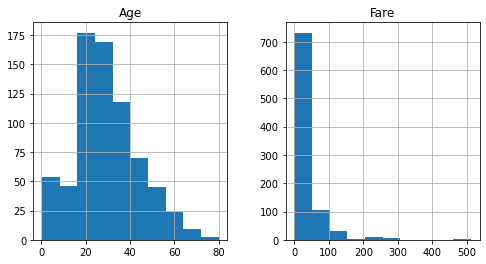

In [12]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(8,4))
plt.show()

In [13]:
data['Age']=data['Age'].fillna(data['Age'].median())

In [14]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [16]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# Check and handle outliers in at least 3 columns in the dataset

[]

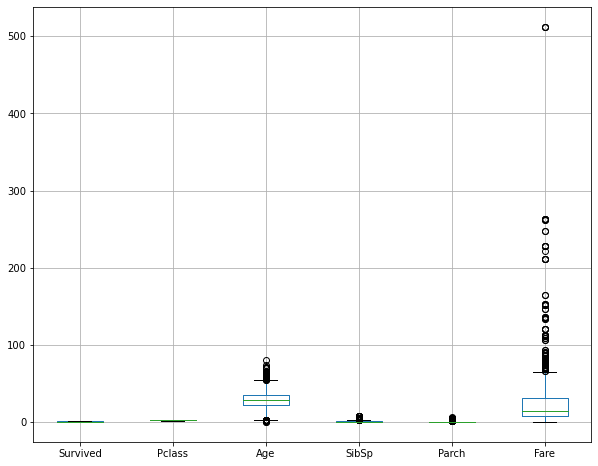

In [17]:
plt.figure(figsize=(10,8))
data.boxplot(return_type='dict')
plt.plot()

In [18]:
#outlier for Age

{'whiskers': [<matplotlib.lines.Line2D at 0x22f88174bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x22f88182310>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f88174820>],
 'medians': [<matplotlib.lines.Line2D at 0x22f88182a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f88182dc0>],
 'means': []}

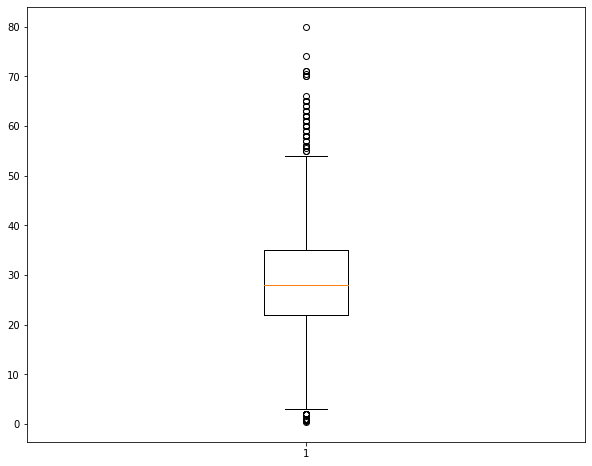

In [19]:
plt.figure(figsize=(10,8))
plt.boxplot(data['Age'])

In [20]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
Up_lim=Q3+(1.5*IQR)
print('low_lim=',low_lim)
print('Up_lim=',Up_lim)

Q1= 22.0
Q2= 28.0
Q3= 35.0
low_lim= 2.5
Up_lim= 54.5


In [21]:
outlier=[]
for x in data['Age']:
    if(x>Up_lim)or (x<low_lim):
        outlier.append(x)

In [22]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [23]:
Age_Outlier=data[(data['Age']>Up_lim) | (data['Age']<low_lim)]
Age_Outlier.index

Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

In [24]:
Age_Outlier=data['Age'][(data['Age']>Up_lim) | (data['Age']<low_lim)].index
Age_Outlier

Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

In [25]:
data.drop(Age_Outlier,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x22f884739a0>,
 'caps': [<matplotlib.lines.Line2D at 0x22f88473fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f884735e0>],
 'medians': [<matplotlib.lines.Line2D at 0x22f88481700>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f88481a90>],
 'means': []}

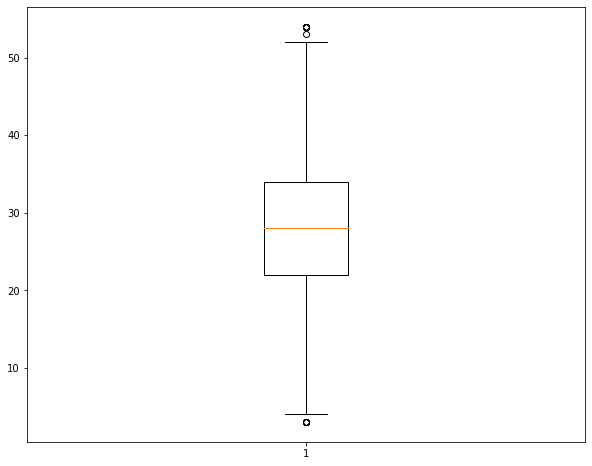

In [26]:
plt.figure(figsize=(10,8))
plt.boxplot(data['Age'])

In [27]:
#outlier for Fare

{'whiskers': [<matplotlib.lines.Line2D at 0x22f884d7250>,
 'caps': [<matplotlib.lines.Line2D at 0x22f884d7970>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f884c9e80>],
 'medians': [<matplotlib.lines.Line2D at 0x22f884e30d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f884e3460>],
 'means': []}

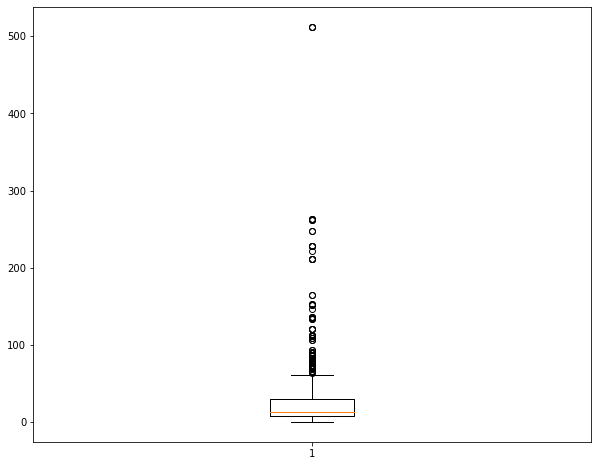

In [28]:
plt.figure(figsize=(10,8))
plt.boxplot(data['Fare'])

In [29]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
Up_lim=Q3+(1.5*IQR)
print('low_lim=',low_lim)
print('Up_lim=',Up_lim)

Q1= 7.8958
Q2= 13.4167
Q3= 30.0708
low_lim= -25.366699999999994
Up_lim= 63.333299999999994


In [30]:
outlier=[]
for x in data['Fare']:
    if(x>Up_lim)or (x<low_lim):
        outlier.append(x)
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [31]:
index=data['Fare'][(data['Fare']>Up_lim)|(data['Fare']<low_lim)].index
index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)

In [32]:
data.drop(index,inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S


In [33]:
data.drop(['Ticket','Cabin','Embarked'],axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500
6,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583
...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500


In [34]:
#outlier for SibSp

{'whiskers': [<matplotlib.lines.Line2D at 0x22f887812e0>,
 'caps': [<matplotlib.lines.Line2D at 0x22f887818e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f88774f10>],
 'medians': [<matplotlib.lines.Line2D at 0x22f8878b040>],
 'fliers': [<matplotlib.lines.Line2D at 0x22f8878b3d0>],
 'means': []}

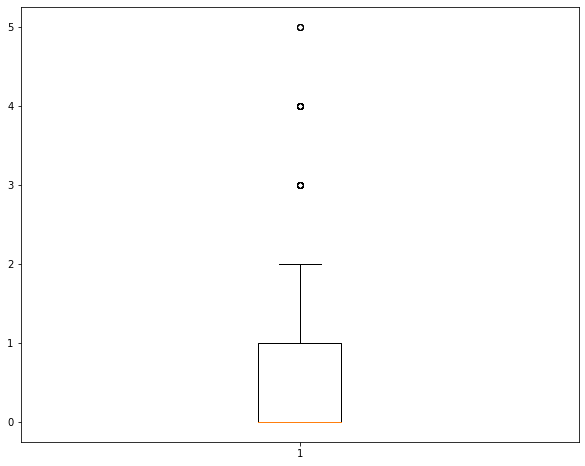

In [35]:
plt.figure(figsize=(10,8))
plt.boxplot(data['SibSp'])

In [36]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR=Q3-Q1
low_lim=Q1-(1.5*IQR)
Up_lim=Q3+(1.5*IQR)
print('low_lim=',low_lim)
print('Up_lim=',Up_lim)

Q1= 0.0
Q2= 0.0
Q3= 1.0
low_lim= -1.5
Up_lim= 2.5


In [37]:
outlier=[]
for x in data['SibSp']:
    if(x>Up_lim)or (x<low_lim):
        outlier.append(x)
outlier

[3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4]

In [38]:
Sib_outlier=data['SibSp'][(data['SibSp']>Up_lim)|(data['SibSp']<low_lim)].index
Sib_outlier

Int64Index([ 25,  51,  60,  64,  69,  72,  86, 172, 177, 183, 230, 234, 262,
            267, 279, 375, 410, 481, 486, 542, 543, 635, 684, 687, 727, 788,
            814, 820, 851],
           dtype='int64', name='PassengerId')

In [39]:
data.drop(Sib_outlier,inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S


In [40]:
df=data.drop(['Ticket','Cabin','Embarked','Name','Sex','Parch'],axis=1)
df

,Survived,Pclass,Age,SibSp,Fare
PassengerId,,,,,
1,0,3,22.0,1,7.2500
3,1,3,26.0,0,7.9250
4,1,1,35.0,1,53.1000
5,0,3,35.0,0,8.0500
6,0,3,28.0,0,8.4583
...,...,...,...,...,...
887,0,2,27.0,0,13.0000
888,1,1,19.0,0,30.0000
889,0,3,28.0,1,23.4500


# Do min max scaling on the feature set (Take ‘Survived’ as target)


In [41]:
df = (df-df.min())/(df.max()-df.min())
df

,Survived,Pclass,Age,SibSp,Fare
PassengerId,,,,,
1,0.0,1.0,0.372549,0.5,0.118118
3,1.0,1.0,0.450980,0.0,0.129115
4,1.0,0.0,0.627451,0.5,0.865114
5,0.0,1.0,0.627451,0.0,0.131152
6,0.0,1.0,0.490196,0.0,0.137804
...,...,...,...,...,...
887,0.0,0.5,0.470588,0.0,0.211798
888,1.0,0.0,0.313725,0.0,0.488765
889,0.0,1.0,0.490196,0.5,0.382051


In [42]:
data['Survived'].count()

689

In [43]:
data['Survived'].describe()

count    689.000000
mean       0.341074
std        0.474415
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [44]:
y = df['Survived'].values
X = df.iloc[:,1:].values

In [45]:
arr=np.array(df['Survived']).reshape(-1, 1)
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
s_Survived=pd.DataFrame(scaler.fit_transform(arr),columns=['Survived'],index=df.index)
s_Survived

,Survived
PassengerId,
1,0.0
3,1.0
4,1.0
5,0.0
6,0.0
...,...
887,0.0
888,1.0
889,0.0
